In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [237]:
data = pd.read_csv('ds/credit_score_data.csv')
data.head()

,ID,Name_surname,Age,Income,Education_Level,Debt_Status,Credit_History_Score,Loan_Type,Outstanding_Debt,Credit_Score
0,1,User_1,60,39814,Primary,Low,517,Personal,67657,1
1,2,User_2,36,51566,Secondary,Medium,525,Personal,77177,0
2,3,User_3,50,119492,Secondary,Low,816,Mortgage,20618,1
3,4,User_4,23,147702,Secondary,High,420,Education,69205,1
4,5,User_5,52,20431,Primary,Medium,375,Mortgage,82348,0


In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    1000 non-null   int64 
 1   Name_surname          1000 non-null   object
 2   Age                   1000 non-null   int64 
 3   Income                1000 non-null   int64 
 4   Education_Level       1000 non-null   object
 5   Debt_Status           1000 non-null   object
 6   Credit_History_Score  1000 non-null   int64 
 7   Loan_Type             1000 non-null   object
 8   Outstanding_Debt      1000 non-null   int64 
 9   Credit_Score          1000 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 78.3+ KB


In [239]:
data.describe()

,ID,Age,Income,Credit_History_Score,Outstanding_Debt,Credit_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.195000,82411.440000,579.034000,48090.129000,0.507000
std,288.819436,15.241302,38854.361436,161.600828,28774.409929,0.500201
min,1.000000,18.000000,15156.000000,301.000000,63.000000,0.000000
25%,250.750000,31.000000,48749.000000,435.000000,23915.750000,0.000000
50%,500.500000,44.500000,83016.000000,574.500000,47116.000000,1.000000
75%,750.250000,57.000000,113958.000000,724.000000,73024.000000,1.000000
max,1000.000000,70.000000,149946.000000,850.000000,99946.000000,1.000000


In [240]:
data.isnull().sum()

ID                      0
Name_surname            0
Age                     0
Income                  0
Education_Level         0
Debt_Status             0
Credit_History_Score    0
Loan_Type               0
Outstanding_Debt        0
Credit_Score            0
dtype: int64

In [241]:
data_cleaned = data.drop(columns= ["ID", "Name_surname"])

In [262]:
data_encoded = pd.get_dummies(data_cleaned, columns= ["Education_Level", "Debt_Status", "Loan_Type"], drop_first= True)

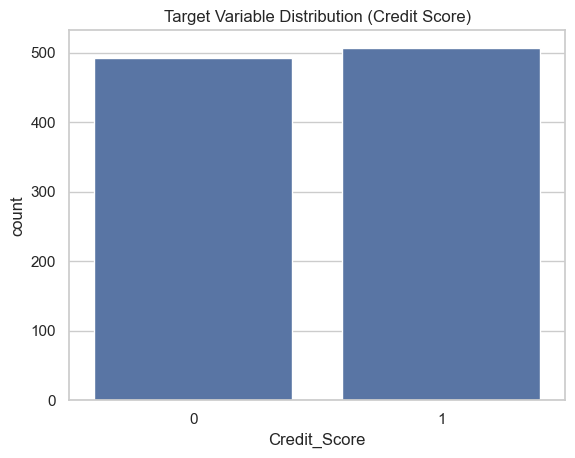

In [243]:
sns.countplot(x='Credit_Score', data= data_cleaned)
plt.title('Target Variable Distribution (Credit Score)')
plt.show()

In [244]:
px.box(data_cleaned, x= "Credit_Score", y= "Income", title= "The Relationship Between Income and Credit Score").show()

In [245]:
X = data_encoded.drop(columns=["Credit_Score"])
y = data_encoded["Credit_Score"]

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [246]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [247]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(xtrain_scaled, ytrain)

RandomForestClassifier(random_state=42)

In [248]:
ypred = rf_model.predict(xtest_scaled)

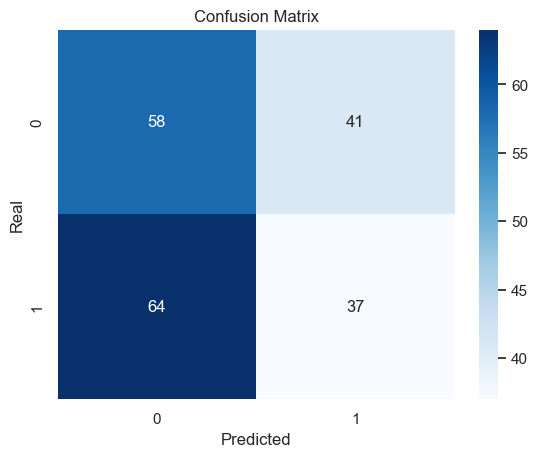

In [249]:
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.show()

In [250]:
data_cleaned["Prediction"] = rf_model.predict(scaler.transform(data_encoded.drop(columns= ["Credit_Score"])))
fig = go.Figure()
for prediction in data_cleaned["Prediction"].unique():
    filtered_data = data_cleaned[data_cleaned["Prediction"] == prediction]
    fig.add_trace(go.Box(
        y= filtered_data["Income"], name=f"Prediction {prediction}", boxmean=True,
        marker= dict(color=np.random.choice(px.colors.qualitative.Plotly))
    ))
    fig.update_layout(
        title = "Income and Prediction Distribution",
        xaxis_title = "Prediction Class",
        yaxis_title= "Income",
        template = "plotly_white"
    )
    fig.show()

In [251]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x= data_cleaned['Credit_Score'],
    nbinsx=20,
    marker=dict(color='skyblue', line=dict(color='black', width=1))
))
fig.update_layout(
    title="Credit Score Distribution",
    xaxis_title="Credit Score",
    yaxis_title= "Frequency",
    bargap=0.2
)
fig.show()

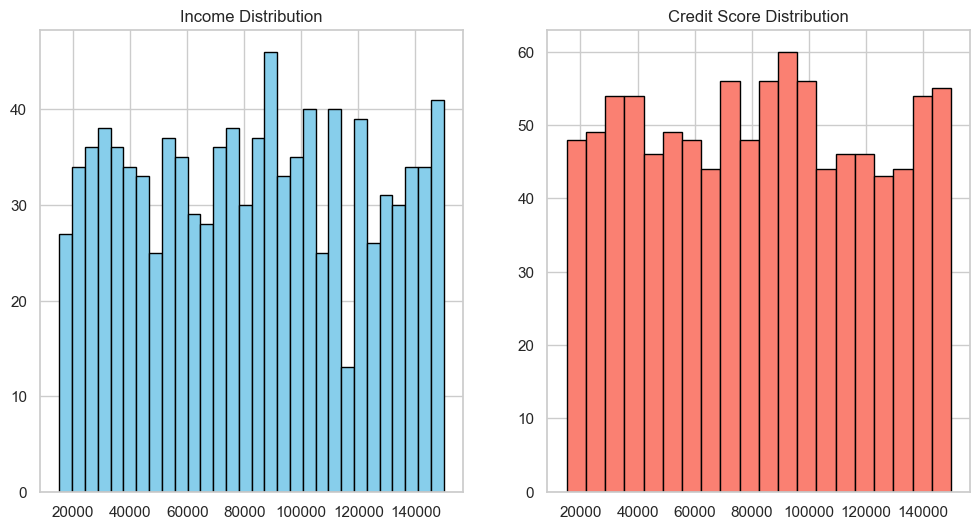

In [252]:
data_cleaned[['Income', 'Credit_Score']].describe()
plt.figure(figsize=(12,6))
plt.subplot(1 , 2, 1)
plt.hist(data_cleaned['Income'], bins=30, color='skyblue', edgecolor="black")
plt.title("Income Distribution")
plt.subplot(1 , 2, 2)
plt.hist(data_cleaned['Income'], bins=20, color='salmon', edgecolor="black")
plt.title("Credit Score Distribution")
plt.show()

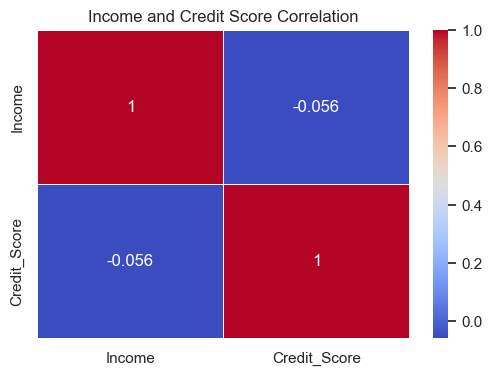

In [253]:
corr_matrix = data_cleaned[['Income', 'Credit_Score']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Income and Credit Score Correlation")
plt.show()

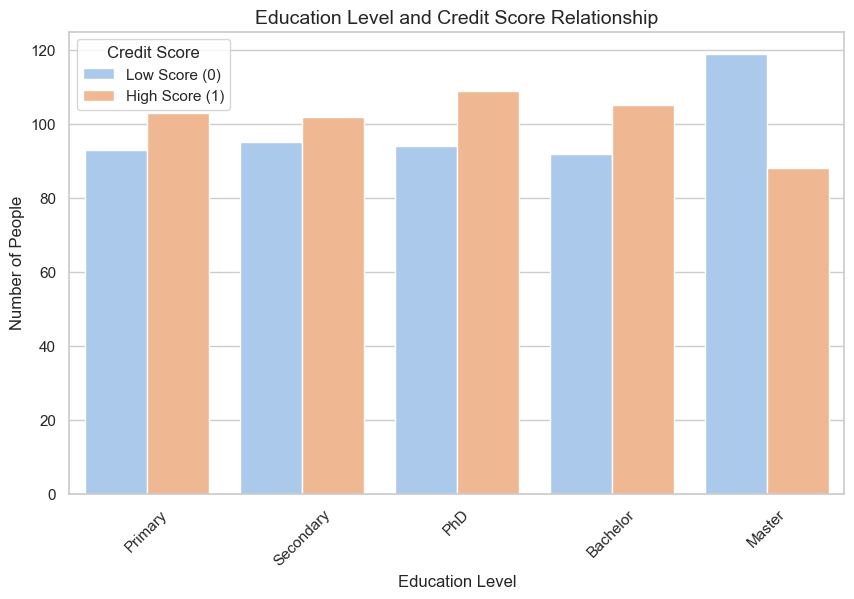

In [254]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Education_Level', hue='Credit_Score', palette='pastel')
plt.title('Education Level and Credit Score Relationship', fontsize=14)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.legend(title='Credit Score', labels=['Low Score (0)', 'High Score (1)'])
plt.xticks(rotation=45)
plt.show()

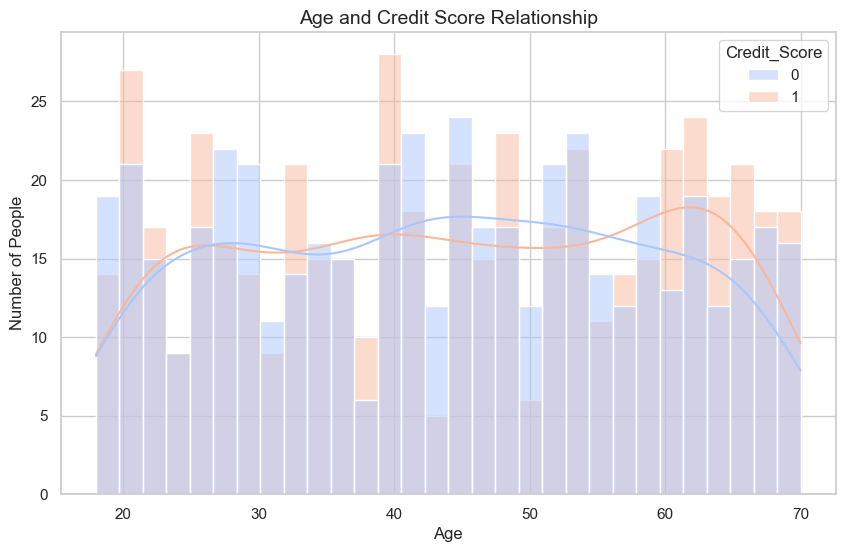

In [257]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Credit_Score', kde=True, palette='coolwarm', bins=30)
plt.title('Age and Credit Score Relationship', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.show()
 
 

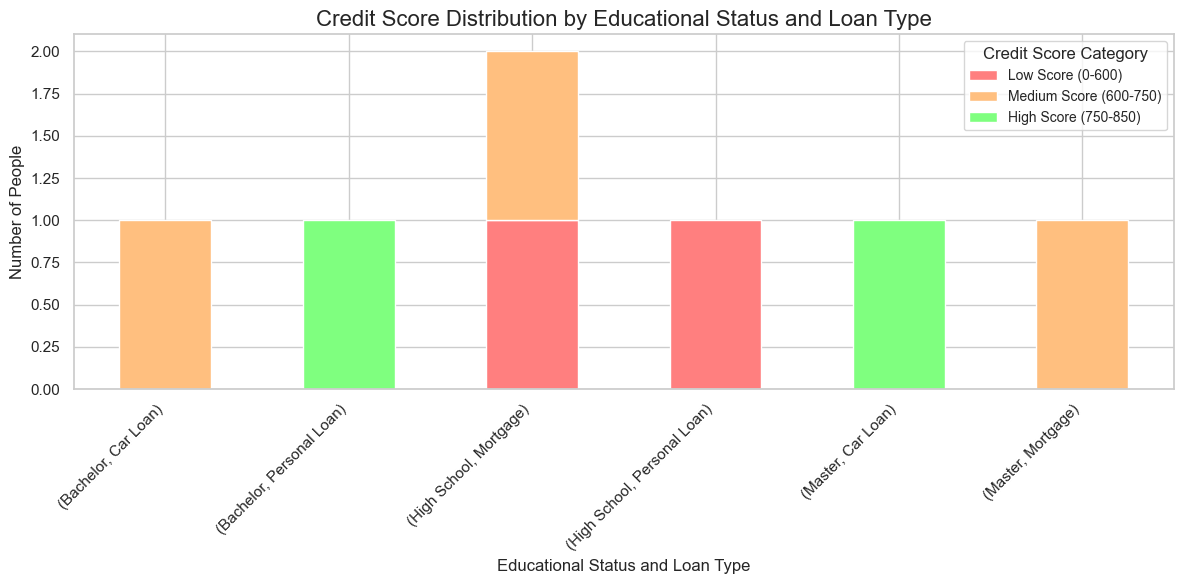

In [261]:
data = pd.DataFrame({
    'Loan_Type': ['Mortgage', 'Car Loan', 'Mortgage', 'Car Loan', 'Personal Loan', 'Personal Loan', 'Mortgage'],
    'Credit_Score': [580, 720, 650, 800, 590, 780, 640],
    'Education_Level': ['High School', 'Bachelor', 'High School', 'Master', 'High School', 'Bachelor', 'Master']  
})
 
bins_score = [0, 600, 750, 850]
labels_score = ['Low Score (0-600)', 'Medium Score (600-750)', 'High Score (750-850)']
data['Credit_Score_Category'] = pd.cut(data['Credit_Score'], bins=bins_score, labels=labels_score)

cross_tab = pd.crosstab([data['Education_Level'], data['Loan_Type']], data['Credit_Score_Category'])
 
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#FF7F7F', '#FFBF7F', '#7FFF7F'])  
plt.title('Credit Score Distribution by Educational Status and Loan Type', fontsize=16)
plt.xlabel('Educational Status and Loan Type', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Credit Score Category', labels=labels_score, title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()
 

In [259]:
accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy Score: {accuracy}")

f1 = f1_score(ytest, ypred)
print(f"F1 Score {f1}")

c_report = classification_report(ytest, ypred)
print(f"Classification Report:\n {c_report}")

Accuracy Score: 0.475
F1 Score 0.4134078212290503
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.59      0.52        99
           1       0.47      0.37      0.41       101

    accuracy                           0.47       200
   macro avg       0.47      0.48      0.47       200
weighted avg       0.47      0.47      0.47       200

